In [1]:
from dataloader import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#### Load Main Dataset

In [2]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
trainX = trainX[trainX['subzone'].isna()]
trainX.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
30,645643,3 bed condo for sale in 1953,1 tessensohn road,1953,Apartment,freehold,2023.0,3.0,3.0,1130,NaN,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",58.0,https://www.99.co/singapore/condos-apartments/...,14.484814,121.023232,0,NaN,NaN
59,627414,4 bed condo for sale in 1953,1 tessensohn road,1953,apartment,freehold,2023.0,4.0,4.0,1399,NaN,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",58.0,https://www.99.co/singapore/condos-apartments/...,14.484814,121.023232,0,NaN,NaN
86,290007,1 bed condo for sale in pollen & bleu,15 farrer drive,pollen & bleu,Condo,99-year leasehold,2017.0,1.0,1.0,549,NaN,unspecified,"1, 2, 3, 4, 5 br",106.0,https://www.99.co/singapore/condos-apartments/...,69.486768,20.184434,0,NaN,NaN
210,351655,3 bed condo for sale in 1953,1 tessensohn road,1953,condo,freehold,2023.0,3.0,NaN,1119,NaN,unfurnished,"studio, 1, 2, 3, 4, 5, 6 br",58.0,https://www.99.co/singapore/condos-apartments/...,14.484814,121.023232,0,NaN,NaN
223,959350,3 bed condo for sale in 1953,1 tessensohn road,1953,condo,freehold,2023.0,3.0,3.0,1152,low,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",58.0,https://www.99.co/singapore/condos-apartments/...,14.484814,121.023232,0,NaN,NaN


In [3]:
def outlier_index(inp_df):
    percentile25 = inp_df.quantile(0.25)
    percentile75 = inp_df.quantile(0.75)
    iqr = percentile75 - percentile25
    lower_range = percentile25 - 1.5 * iqr
    upper_range = percentile75 + 1.5 * iqr

    lower_bad = inp_df[inp_df < lower_range].index
    upper_bad = inp_df[inp_df > upper_range].index
    all_bad = lower_bad.union(upper_bad)
    
    return all_bad

In [4]:
lat_outliers, lng_outliers, price_outliers = \
    outlier_index(trainX['lat']), outlier_index(trainX['lng']), outlier_index(trainY)

all_outliers = lat_outliers.union(lng_outliers).union(price_outliers)
trainX, trainY = trainX.drop(all_outliers), trainY.drop(all_outliers)

lat_arr, lng_arr = trainX['lat'].astype(float).to_numpy(), trainX['lng'].astype(float).to_numpy()
price_arr = trainY.astype(float).to_numpy()

KeyError: '[    2     7    18 ... 20194 20241 20248] not found in axis'

#### Load Auxiliary Data

In [ ]:
commercial_centres, _ = read_csv('data/auxiliary-data/sg-commerical-centres.csv')
mrt_stations, _ = read_csv('data/auxiliary-data/sg-mrt-stations.csv')
primary_schools, _ = read_csv('data/auxiliary-data/sg-primary-schools.csv')
secondary_schools, _ = read_csv('data/auxiliary-data/sg-secondary-schools.csv')
shopping_malls, _ = read_csv('data/auxiliary-data/sg-shopping-malls.csv')

#### Create Price Heatmap

In [5]:
# plt.hexbin(lng_arr, lat_arr, C=price_arr, gridsize=100, cmap=cm.jet, bins=None)
plt.hexbin(lng_arr, lat_arr, C=np.ones(len(lat_arr)), gridsize=100, cmap=cm.jet, bins=None)
plt.axis([103.65, 104.0, 1.2, 1.5])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

NameError: name 'lng_arr' is not defined

#### Create Auxiliary Data Heatmap

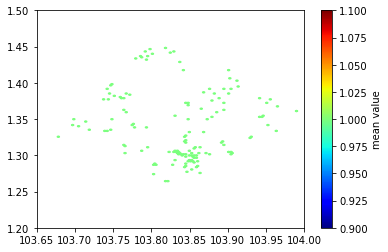

In [76]:
# aux_data = commercial_centres
# aux_data = mrt_stations
# aux_data = primary_schools
# aux_data = secondary_schools
aux_data = shopping_malls


lat_arr, lng_arr = aux_data['lat'].astype(float).to_numpy(), aux_data['lng'].astype(float).to_numpy()

plt.hexbin(lng_arr, lat_arr, C=np.ones(len(lat_arr)), gridsize=100, cmap=cm.jet, bins=None)
plt.axis([103.65, 104.0, 1.2, 1.5])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show() 